# Multiscale time series forecasting

The goal of this notebook is to demonstrate the framework of simultaneous forecasting of multiple multiscale time series. The forecasting procedure includes the following steps:
* time scaling 
* reduction of forecasting to regression
* feature generation
* feature selection
* regression

In [1]:
from __future__ import division
from __future__ import print_function

import os
import sys

os.chdir(os.path.abspath(os.path.join('..'))) # current dir is changed here, so don't run this sell more then once!

In [2]:
import pandas as pd
from sklearn.linear_model import Lasso
from RegressionMatrix import regression_matrix, random_data
from LoadAndSaveData import load_time_series
from Forecasting import frc_class
import my_plots
from collections import namedtuple
tsStruct = namedtuple('tsStruct', 'data request history name readme')

from IPython import display
import matplotlib.pyplot as plt
%matplotlib inline

# Load your modules

## Loading data
For now, use the default dataset

In [3]:
# see if the data is downloaded yet
load_raw = not os.path.exists(os.path.join("ProcessedData", "EnergyWeather_orig_train.pkl"))

ts_struct = load_time_series.load_all_time_series(datasets='EnergyWeather', load_raw=load_raw, name_pattern="train")[0]
# Recommended to set load_raw=True if you haven't updated the repo for a long time:
# ts_struct = load_time_series.load_all_time_series(datasets='EnergyWeather', load_raw=True, name_pattern="train")[0]


print("Time series name: {}".format(ts_struct.name))
print(ts_struct.readme)
print(ts_struct.summarize_ts())


Time series name: EnergyWeather_missing_value_train_0.01
Energy-weather time series with artificially inserted missing values


C:\Users\motrenko\AppData\Local\Continuum\Miniconda2\lib\site-packages\numpy\lib\function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


                   N. obs.            Min            Max     T. min  \
Energy               20096  119995.000000  602703.000000 1970-01-01   
Max Temperature       1081      -9.913000      35.712002 1970-01-01   
Min Temperature       1085     -16.389000      20.694000 1970-01-01   
Precipitation         1084       0.000000      32.689484 1970-01-01   
Wind                  1086       0.869133       8.273607 1970-01-01   
Relative Humidity     1083       0.295366       0.997529 1970-01-01   
Solar                 1080       0.293850      30.174639 1970-01-01   

                                          T.max        T. delta  Nans  
Energy            1970-01-01 00:00:00.094690800 00:00:00.000003  6208  
Max Temperature   1970-01-01 00:00:00.094608000 00:00:00.000086    15  
Min Temperature   1970-01-01 00:00:00.094608000 00:00:00.000086    11  
Precipitation     1970-01-01 00:00:00.094608000 00:00:00.000086    12  
Wind              1970-01-01 00:00:00.094608000 00:00:00.000086    10  

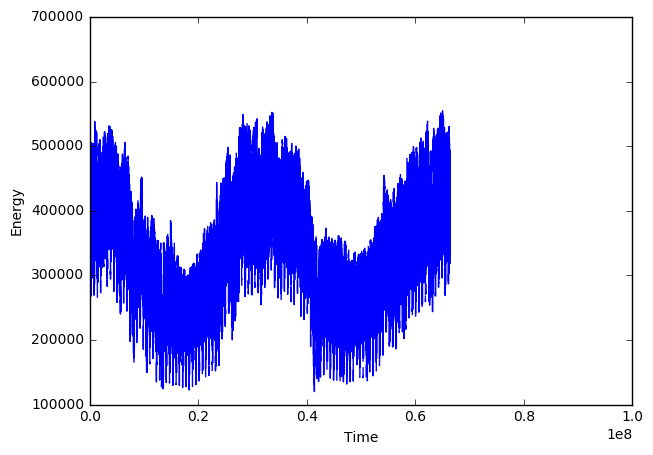

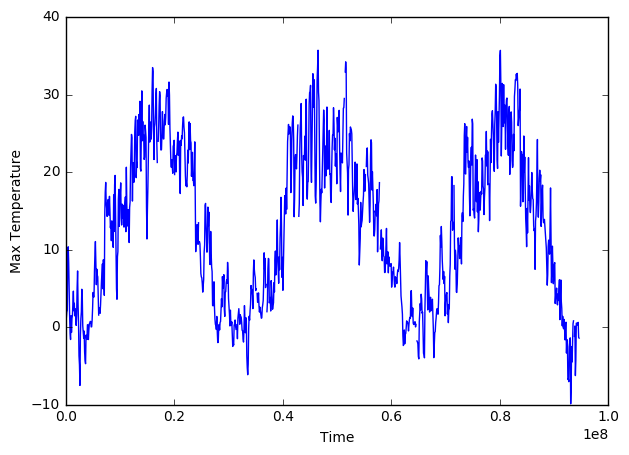

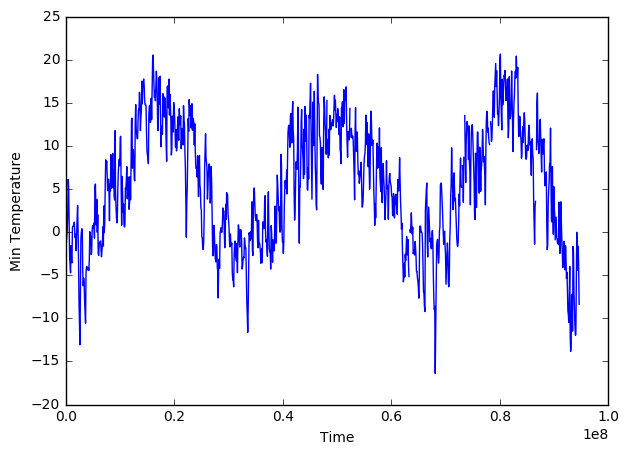

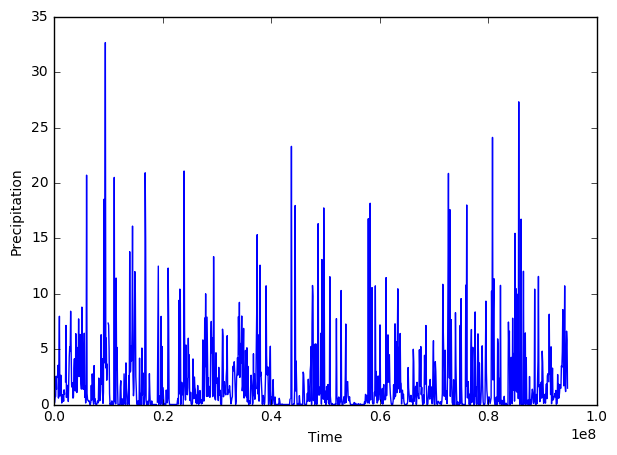

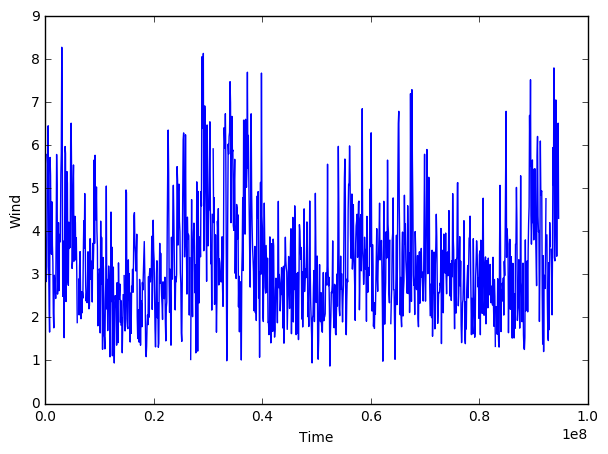

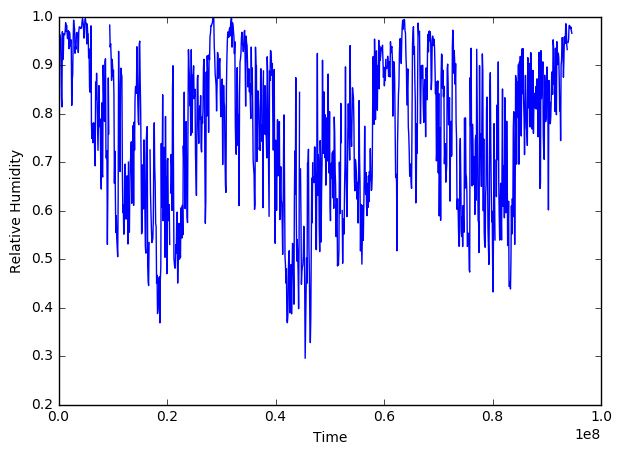

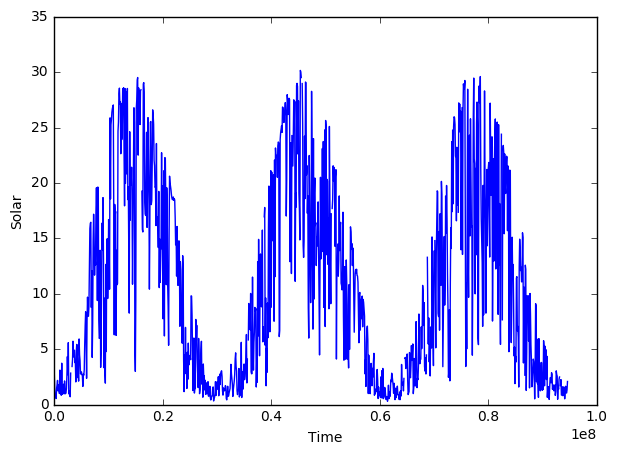

In [4]:
# plot the data
# display.clear_output(wait=True)
for ts in ts_struct.data:
    plt.figure(figsize=(7, 5))
    #plt.title("Time series" + ts_struct.name)
    plt.xlabel("Time")
    plt.ylabel(ts.name)
    plt.plot(ts.T, 'b')
    plt.show()

## Problem statement

Consider a large set of time series $\{\mathbf{s}^{(q)}| \; q = 1,\dots, {Q}\}$, where each real-valued time series $\mathbf s$
$$ \mathbf{s} = [s_1, \dots, s_i, \dots, s_{T}], ~ s_i = s(t_i),\quad 0 \leq t_i \leq t_{\max} $$
is a sequence of observations $s_i = s(t_i)$ of some real-valued signal $s(t)$.

The task is to obtain forecasts $\hat{s}(t_i)$ for  $\Delta t_r <  t_i \leq T_{\max} + \Delta t_r$, given the set $\{\mathbf{s}^{(q)}| \; q = 1,\dots, {Q}\}$

### Time scaling

Each time series $\mathbf{s}^{(q)}$ has its own sampling rate $1/\tau^{(q)}$: $t_i^{(q)} = {i}\cdot\tau^{(q)}.$ Time entries may be uneven. The task is to approximate/resample time series, so that the time entries are evenly placed.

In [5]:
# (Is yet to come)
# For now the time scaling problem is not an issue
# Missing values are imputed inside create_matrix() method.

### Forecasting as regression problem

The design matrix $\mathbf{X}^*$ for the multiscale autoregressive problem statement is constructed  as follows. Let $\mathbf{s}^{(q)}_i$ denote the~$i$-th segment of the time series $\mathbf{s}^{(q)}$
$$
[\mathbf{x}^{(q)}_i | \mathbf{y}^{(q)}_i] =
 \underbrace{s^{(q)}(t_i-\Delta t_r-\Delta t_p),\dots,}_{\mathbf{x}^{(q)}_i} \underbrace{s^{(q)}(t_i-\Delta t_r),\;\dots,s^{(q)}(t_i))}_{\mathbf{y}^{(q)}_i}], $$

where $s^{(q)}(t)$ is an element of time series $\mathbf{s}^{(q)}$.

To construct the design matrix, select $t_i$, $i = 1, \dots, m$ from $\{t_1, \dots, t_T\}$ such that segments $\mathbf{s}_i = [\mathbf{x}_i|\mathbf{y}_i]$ cover time series $\mathbf{s}$ without intersection in target parts  $\mathbf{y}_i$:
$$ |t_{i+1} - t_i| > \Delta t_r. $$
Extract segments $[\mathbf{x}^{(q)}_i | \mathbf{y}^{(q)}_i]$, $i = 1, \dots, m$ from all time series $\mathbf{s}^{(q)}$ and form the matrix $\mathbf{X}^*$.

In [6]:
# create regression matrix X*
TS_IDX = [0, 1, 2, 4, 5, 6] # exclude Precipitation from the list
data = regression_matrix.RegMatrix(ts_struct, x_idx=TS_IDX, y_idx=TS_IDX)
data.create_matrix(nsteps=1, norm_flag=True)

print("Data shape: X {}, Y {}".format(data.X.shape, data.Y.shape))

Data shape: X (1089L, 203L), Y (1089L, 29L)


### Feature generation and selection
Coming soon...

In [7]:
# Dummy models:
# leave these as they are if you don't want any feature generation / selection 
generator = frc_class.IdentityGenerator(name="Identity generator")
selector = frc_class.IdentityModel(name="Identity selector")


### Example forecast

In [8]:
# split into train and test
TRAIN_TEST_RATIO = 0.75
data.train_test_split(TRAIN_TEST_RATIO)

frc_model = frc_class.CustomModel(Lasso, name="Lasso", alpha=0.01) # Your model here! The model should have .fit(X) and .predict(X, y) methods
# the model incorporates feature generation and selection schemes:
model, frc, sel, gen = data.train_model(frc_model=frc_model, generator=generator, selector=selector)


In [9]:
# Regress X on Y and ravel Y to data.forecasts (list of data.nts 1d-arrays)
data.forecast(model, replace=True) # replace=True: new forecasts overwrite data.forecasts; first "history" inputs are left zero

# Errors:
train_mae = data.mae(idx_rows=data.idx_train, out=None)
train_mape = data.mape(idx_rows=data.idx_train, out=None)

test_mae = data.mae(idx_rows=data.idx_test, out=None)
test_mape = data.mape(idx_rows=data.idx_test, out=None)

In [10]:
index = [ts_struct.data[i].name for i in TS_IDX]
res1 = pd.DataFrame(train_mae, index=index, columns=[("MAE", "train")])
res2 = pd.DataFrame(train_mape, index=index, columns=[("MAPE", "train")])
res3 = pd.DataFrame(test_mae, index=index, columns=[("MAE", "test")])
res4 = pd.DataFrame(test_mape, index=index, columns=[("MAPE", "test")])
res = pd.concat([res1, res2, res3, res4], axis=1)
print(res)

# optionally, save results to latex file
my_plots.save_to_latex([res], df_names=[ts_struct.name + ": Linear regression, no feature generation or selection"], 
                       file_name="out_fname")

                   (MAE, train)  (MAPE, train)   (MAE, test)  (MAPE, test)
Energy             31065.277344       0.104642  35282.769531      0.123820
Max Temperature        2.860367       2.353412      3.230193      0.974500
Min Temperature        2.463203       4.890547      3.083503      1.032810
Wind                   0.894902       0.327407      0.839764      0.325480
Relative Humidity      0.075312       0.110159      0.077752      0.108640
Solar                  3.321194       0.830028      4.298123      0.848472


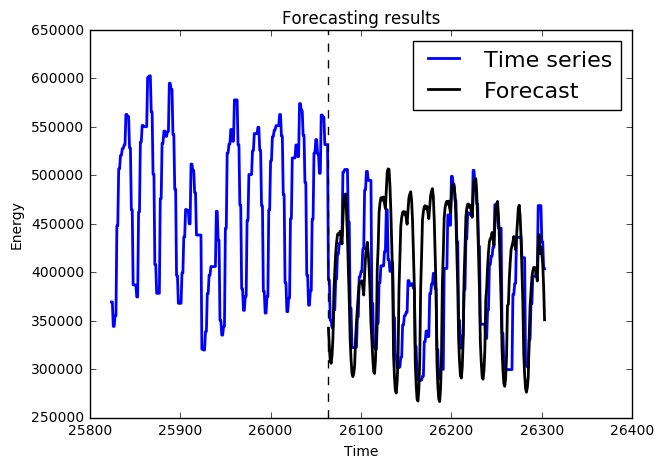

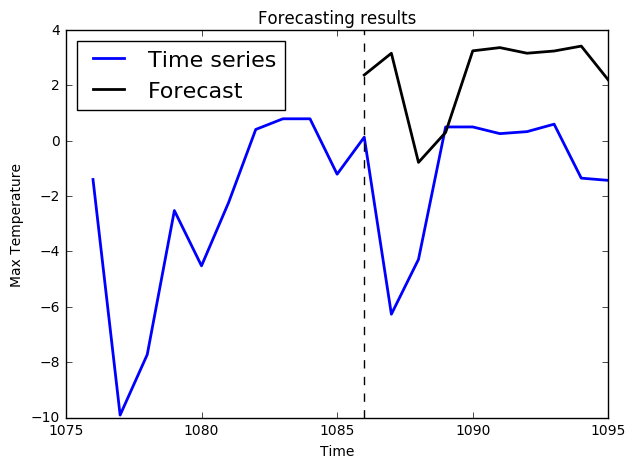

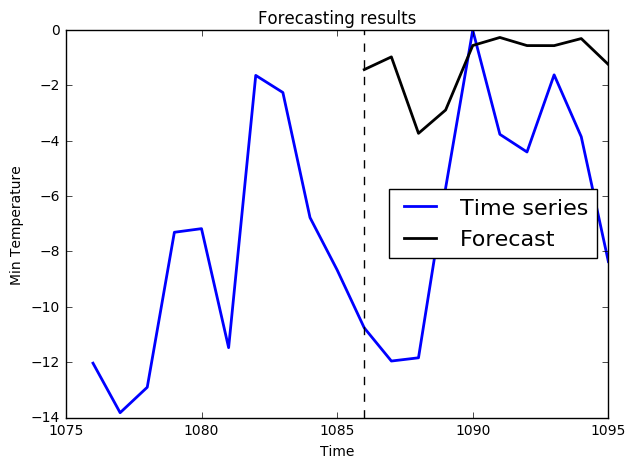

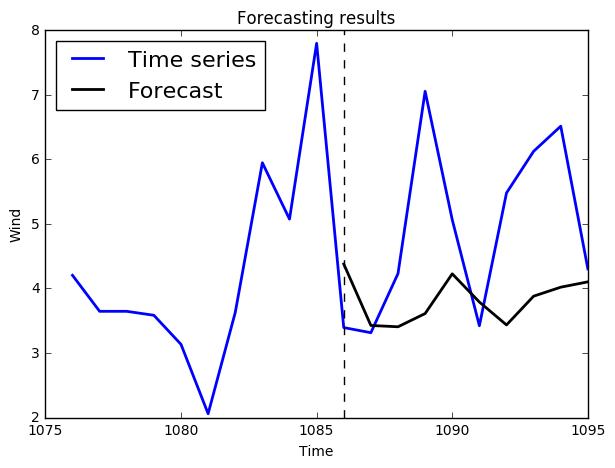

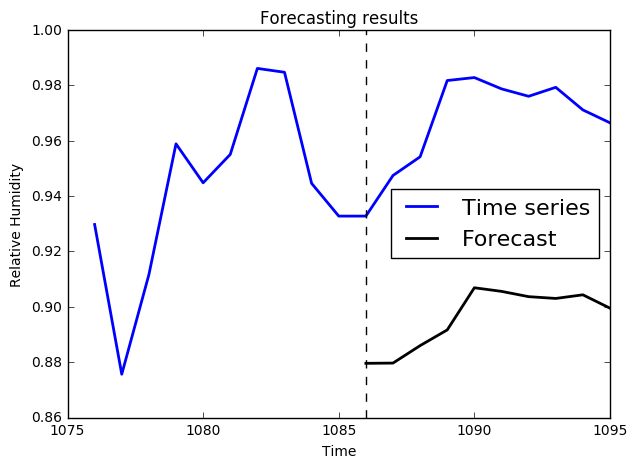

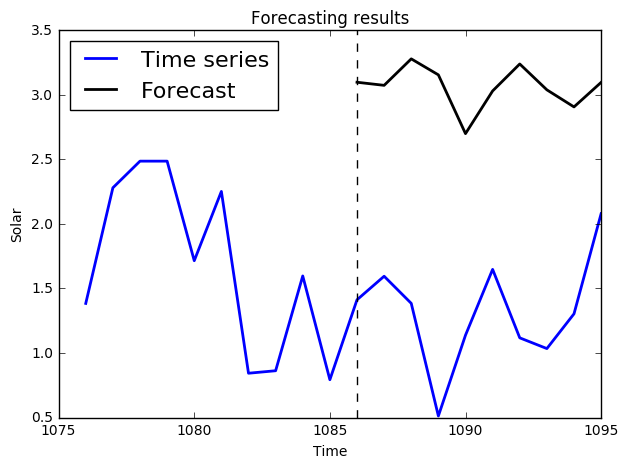

In [14]:
# plot results
data.plot_frc(n_frc=10, n_hist=10, save=False)